# Project 2: Cars4U

# Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

# Objective:

## 1. Explore and visualize the dataset
## 2. Build a linear regression model to predict the prices of used cars
## 3. Generate a set of insight and recommendations that will help the business

# Index:

S.No. : Serial Number

Name : Name of the car which includes Brand name and Model name

Location : The location in which the car is being sold or is available for purchase Cities

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)
Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#stop displays in scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#display all columns
pd.set_option('display.max_columns', None)

# To create linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [414]:
data = pd.read_csv("used_cars_data.csv")

In [415]:
df = data.copy()

# Describe the dataset and view some rows to get an idea of the data.

In [416]:
df.describe(include='all')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000,7253,7253,7253.000,7253.000,7253,7253,7253,7251,7207,7207,7200.000,1006,6019.000
unique,nan,2041,11,nan,nan,5,2,4,450,150,386,nan,625,nan
top,nan,Mahindra XUV500 W8 2WD,Mumbai,nan,nan,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,nan,33.36 Lakh,nan
freq,nan,55,949,nan,nan,3852,5204,5952,207,732,280,nan,6,nan
mean,3626.000,NaN,NaN,2013.365,58699.063,NaN,NaN,NaN,NaN,NaN,NaN,5.280,NaN,9.479
std,2093.905,NaN,NaN,3.254,84427.721,NaN,NaN,NaN,NaN,NaN,NaN,0.812,NaN,11.188
min,0.000,NaN,NaN,1996.000,171.000,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.440
25%,1813.000,NaN,NaN,2011.000,34000.000,NaN,NaN,NaN,NaN,NaN,NaN,5.000,NaN,3.500
50%,3626.000,NaN,NaN,2014.000,53416.000,NaN,NaN,NaN,NaN,NaN,NaN,5.000,NaN,5.640
75%,5439.000,NaN,NaN,2016.000,73000.000,NaN,NaN,NaN,NaN,NaN,NaN,5.000,NaN,9.950


In [417]:

df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,NaN,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,NaN,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.61 Lakh,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,NaN,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,NaN,17.740
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.000,NaN,2.350
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.000,NaN,3.500
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.000,21 Lakh,17.500
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.000,NaN,5.200
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.000,NaN,1.950


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Several columns contain numerical data which we want to calculate the statistics of, so it needs to be converted to a numeric type.

# Convert columns to numerical type

In [419]:
df['Price'] = df['Price'].replace('[^.0-9]', '', regex=True).astype(float)
df['New_Price'] = df['New_Price'].replace('[^.0-9]', '', regex=True).astype(float)
df['Engine'] = df['Engine'].replace('[^.0-9]', '', regex=True).astype(float)


Before the transformation the unit 'Lakh' was in some of the price and new_price columns which is 100,000 units. The max price and new_price are 160 and 99.92, which shows that the units for the price are all in Lakh.

In [420]:
df['Power'] = pd.to_numeric(df['Power'].replace('[^.0-9]', '', regex=True), errors='coerce').astype(float)

The Power column has cases where using the replace function like the others will leave a blank entry, which cant be converted to a column, so I use to_numeric funtion with errors='coerce.

# Make a column for car manufacturer, since name gives too many columns when doing forward feature engineering

In [421]:
def get_make_from_name(x):
    make = x.split(' ')
    return make[0]

In [422]:
df['Make'] = df['Name'].apply(lambda x: get_make_from_name(x))
df = df.drop('Name', axis=1)

# Convert Mileage column to numeric

In [423]:
def convert_mileage(x):
    if isinstance(x, str):
        if 'km/kg' in x:
            value = re.sub('[^.0-9]', '', x)
            value = float(value)
            return value*0.75
        else:
            value = re.sub('[^.0-9]', '', x)
            value = float(value)
            return value

The Mileage column has a mixture of units (L/Km and Kg/Km) so I check what the unit is, and if it's Kg/Km I convert to L/Km, and strip away the text so it can be converted to a numeric type.

In [424]:
df['Mileage'] = df['Mileage'].apply(lambda x: convert_mileage(x))

In [425]:
df['Mileage']

0      19.950
1      19.670
2      18.200
3      20.770
4      15.200
        ...  
7248   20.540
7249   17.210
7250   23.080
7251   17.200
7252   10.000
Name: Mileage, Length: 7253, dtype: float64

In [426]:
df[df['Mileage'].isna()]

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
4446,4446,Chennai,2016,50000,Electric,Automatic,First,nan,72.000,41.000,5.000,13.580,13.000,Mahindra
4904,4904,Mumbai,2011,44000,Electric,Automatic,First,nan,1798.000,73.000,5.000,nan,12.750,Toyota


Here I check to see if any other Mileage values are na, and they are only for electric vehicles, which makes sense.

In [427]:
df.describe(include='all')

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
count,7253.000,7253,7253.000,7253.000,7253,7253,7253,7251.000,7207.000,7078.000,7200.000,1006.000,6019.000,7253
unique,nan,11,nan,nan,5,2,4,nan,nan,nan,nan,nan,nan,33
top,nan,Mumbai,nan,nan,Diesel,Manual,First,nan,nan,nan,nan,nan,nan,Maruti
freq,nan,949,nan,nan,3852,5204,5952,nan,nan,nan,nan,nan,nan,1444
mean,3626.000,NaN,2013.365,58699.063,NaN,NaN,NaN,18.079,1616.573,112.765,5.280,19.894,9.479,NaN
std,2093.905,NaN,3.254,84427.721,NaN,NaN,NaN,4.497,595.285,53.494,0.812,19.814,11.188,NaN
min,0.000,NaN,1996.000,171.000,NaN,NaN,NaN,0.000,72.000,34.200,0.000,1.000,0.440,NaN
25%,1813.000,NaN,2011.000,34000.000,NaN,NaN,NaN,15.100,1198.000,75.000,5.000,7.635,3.500,NaN
50%,3626.000,NaN,2014.000,53416.000,NaN,NaN,NaN,18.160,1493.000,94.000,5.000,11.270,5.640,NaN
75%,5439.000,NaN,2016.000,73000.000,NaN,NaN,NaN,21.025,1968.000,138.100,5.000,23.640,9.950,NaN


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
 13  Make               7253 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In the describe and info we can see that the columns were successfully converted to float64, and that we can calculate the statistics for the columns.

In [429]:
df.isna().sum()

S.No.                   0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Make                    0
dtype: int64

# Impute missing values

In [430]:
df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000,7253.000,7253.000,7251.000,7207.000,7078.000,7200.000,1006.000,6019.000
mean,3626.000,2013.365,58699.063,18.079,1616.573,112.765,5.280,19.894,9.479
std,2093.905,3.254,84427.721,4.497,595.285,53.494,0.812,19.814,11.188
min,0.000,1996.000,171.000,0.000,72.000,34.200,0.000,1.000,0.440
25%,1813.000,2011.000,34000.000,15.100,1198.000,75.000,5.000,7.635,3.500
50%,3626.000,2014.000,53416.000,18.160,1493.000,94.000,5.000,11.270,5.640
75%,5439.000,2016.000,73000.000,21.025,1968.000,138.100,5.000,23.640,9.950
max,7252.000,2019.000,6500000.000,28.400,5998.000,616.000,10.000,99.920,160.000


In [431]:
df['New_Price'] = df['New_Price'].replace(np.NaN, df['New_Price'].mean())
df['Seats'] = df['Seats'].replace(np.NaN, df['Seats'].mean())
df['Power'] = df['Power'].replace(np.NaN, df['Power'].mean())
df['Engine'] = df['Engine'].replace(np.NaN, df['Engine'].mean())
df['Price'] = df['Price'].replace(np.NaN, df['Price'].mean())
#Setting Mileage to max because they are electric vehicles, and i want them to correlate as if they have a high Mileage.
df['Mileage'] = df['Mileage'].replace(np.NaN, df['Mileage'].max())


In [432]:
df.isna().sum()

S.No.                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Make                 0
dtype: int64

# Univariate analysis

In [433]:
#Creating helper functions for different graphs to make it easier

def boxplot(column): 
    sns.boxplot(column, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    
def histogram(column):
    sns.distplot(column, color="blue", kde=False)

In [434]:
df['Price'].describe()

count   7253.000
mean       9.479
std       10.192
min        0.440
25%        3.850
50%        6.750
75%        9.479
max      160.000
Name: Price, dtype: float64

# Price

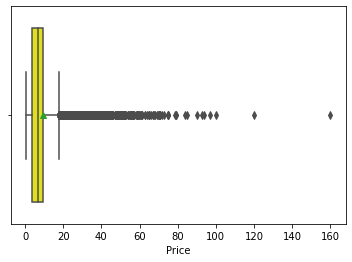

In [435]:
boxplot(df['Price'])

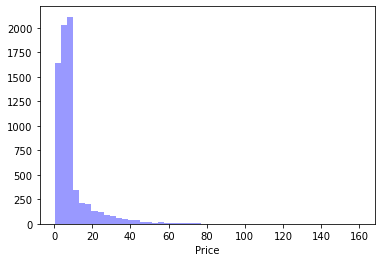

In [436]:
histogram(df['Price'])

Price is skewed to the right, with many vehicles outside of the IQR.
Mean Price 9.47 Lakh

# New Price

In [437]:
df['New_Price'].describe()

count   7253.000
mean      19.894
std        7.376
min        1.000
25%       19.894
50%       19.894
75%       19.894
max       99.920
Name: New_Price, dtype: float64

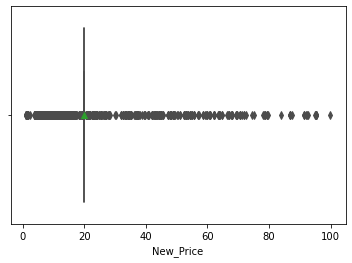

In [438]:
boxplot(df['New_Price'])

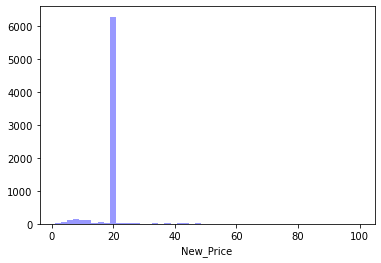

In [439]:
histogram(df['New_Price'])

New Price is right skewed, with the mean car price being almsot double that of the median. This column also has a significant number of missing values

# Year

In [440]:
df['Year'].describe()

count   7253.000
mean    2013.365
std        3.254
min     1996.000
25%     2011.000
50%     2014.000
75%     2016.000
max     2019.000
Name: Year, dtype: float64

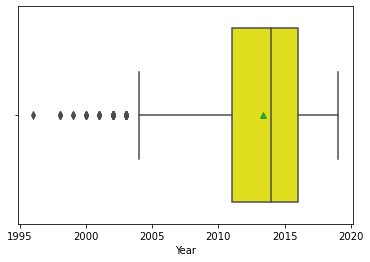

In [441]:
boxplot(df['Year'])

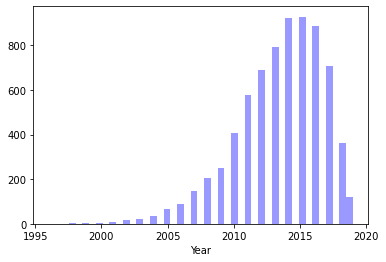

In [442]:
histogram(df['Year'])

Year is slightly left skewed, with a mean lower than the median

# KM Driven

In [443]:
df['Kilometers_Driven'].describe()

count      7253.000
mean      58699.063
std       84427.721
min         171.000
25%       34000.000
50%       53416.000
75%       73000.000
max     6500000.000
Name: Kilometers_Driven, dtype: float64

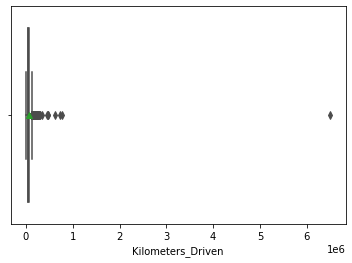

In [444]:
boxplot(df['Kilometers_Driven'])

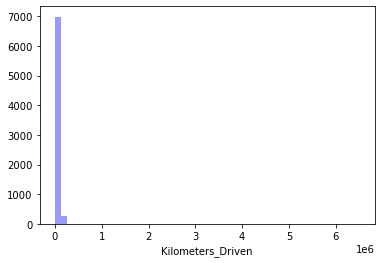

In [445]:
histogram(df['Kilometers_Driven'])

KM driven is slightly right skewed, and has one large outlier vehicle. 

# Mileage

In [446]:
df['Mileage'].describe()

count   7253.000
mean      18.082
std        4.500
min        0.000
25%       15.100
50%       18.160
75%       21.030
max       28.400
Name: Mileage, dtype: float64

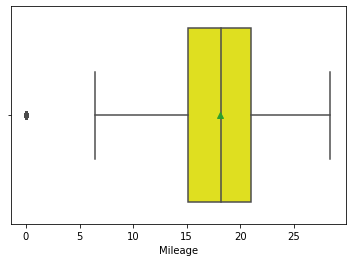

In [447]:
boxplot(df['Mileage'])

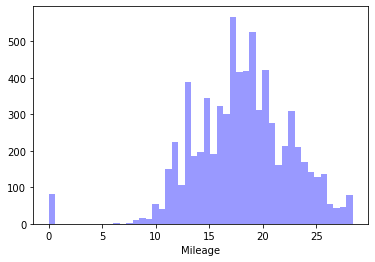

In [448]:
histogram(df['Mileage'])

Mileage is quite symetrical, with the mean and median being almost the same

# Bivariate Analysis

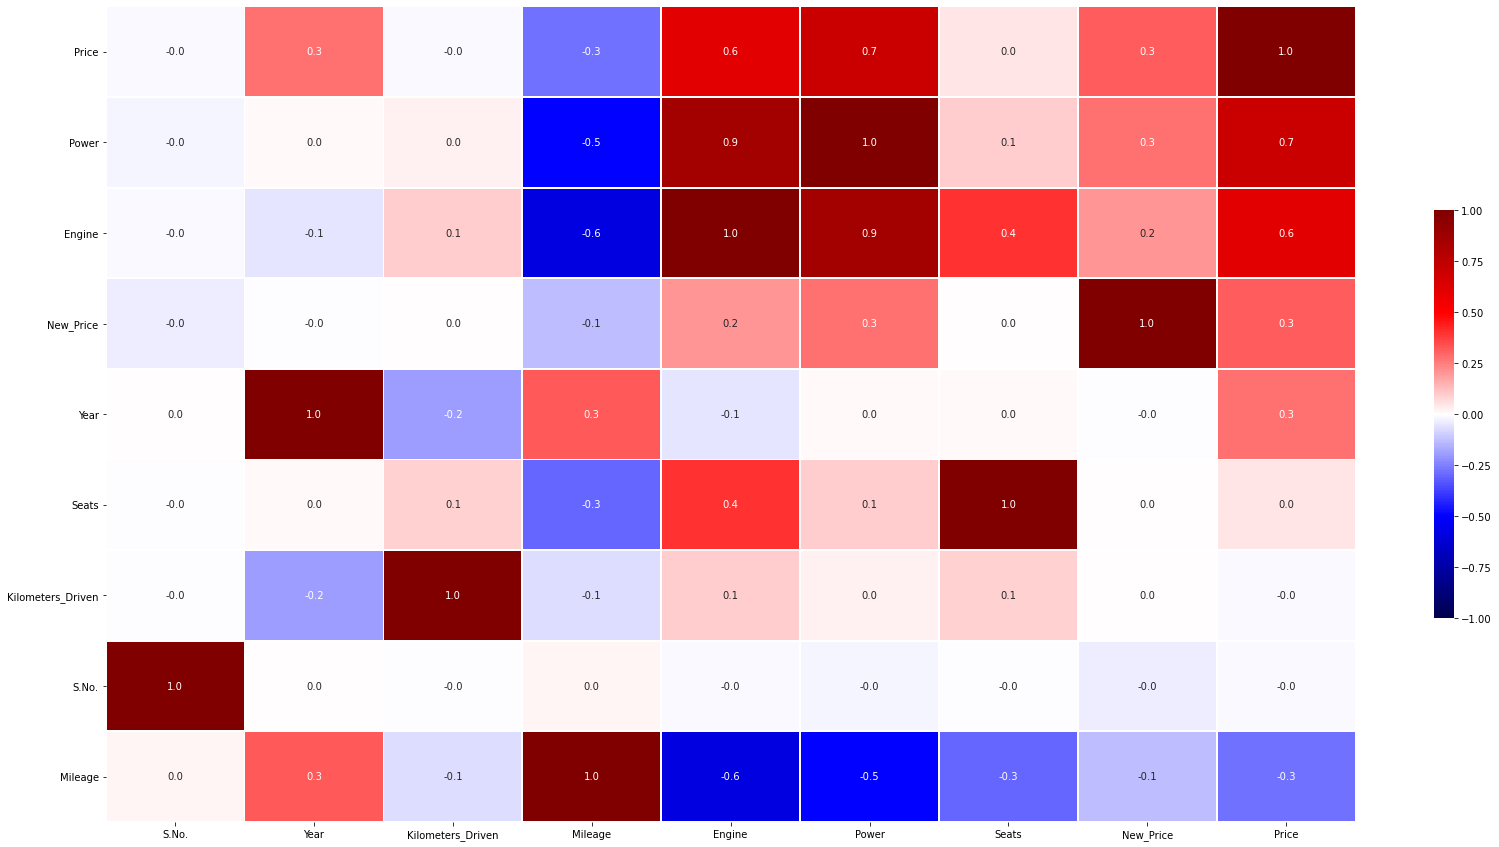

In [449]:
#Took this snippet Case Study.

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_columns].corr().sort_values(by=['Price'],ascending=False)

f, ax = plt.subplots(figsize=(28, 15))

sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

Price has high correlation with Engine size and power, and slightly correlated with Year and New Price.

# Treat Outliers

In [450]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [451]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

Here I am looking for values that are outside of the IQR, and if they are below it, i set them to the minimum value in it, and if its aboive, i set it to the max.

# Creating new dataframes for independent and dependent variables

In [452]:
X = df.drop(['Price'], axis=1)
#Creating Y dependent variable here as well
Y = df[['Price']]

In [453]:
print(X.shape)
print(Y.shape)

(7253, 13)
(7253, 1)


# Create dummy variables for Fuel Type, Transmission, Make, Location, and Owner Type

In [454]:
X = pd.get_dummies(X, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Make', 'Location'], drop_first=True)

In [455]:
X.head()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,2010.000,72000,19.950,998.000,58.160,5.000,19.894,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2015.000,41000,19.670,1582.000,126.200,5.000,19.894,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2011.000,46000,18.200,1199.000,88.700,5.000,19.894,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,2012.000,87000,20.770,1248.000,88.760,5.000,19.894,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,2013.000,40670,15.200,1968.000,140.800,5.000,19.894,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Creating these new labels allow me to use them in our model, without using a numeric mapping that gives preference to a certain value.

# Train and Evaluate data model

In [456]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Seperate the data into training and test sets for the dependent and independent variables

In [457]:
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [458]:
X_train.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
count,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000,5077.000
mean,3642.977,2013.378,56256.659,18.080,1613.227,111.158,5.000,19.894,0.527,0.000,0.002,0.462,0.716,0.002,0.160,0.019,0.039,0.043,0.000,0.019,0.002,0.005,0.000,0.045,0.000,0.104,0.185,0.000,0.000,0.006,0.003,0.000,0.008,0.048,0.197,0.056,0.004,0.005,0.016,0.000,0.002,0.023,0.030,0.000,0.030,0.070,0.052,0.004,0.061,0.083,0.110,0.093,0.117,0.069,0.109,0.088,0.130,0.102
std,2090.360,3.212,29913.755,4.283,567.337,46.068,0.000,0.000,0.499,0.020,0.047,0.499,0.451,0.042,0.367,0.138,0.194,0.203,0.014,0.138,0.049,0.070,0.020,0.208,0.000,0.305,0.388,0.020,0.020,0.079,0.054,0.014,0.092,0.214,0.398,0.230,0.061,0.071,0.125,0.014,0.049,0.149,0.169,0.000,0.171,0.256,0.223,0.059,0.239,0.275,0.313,0.290,0.321,0.254,0.312,0.284,0.336,0.303
min,1.000,2003.500,171.000,6.205,72.000,34.200,5.000,19.894,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1842.000,2011.000,34200.000,15.100,1198.000,78.000,5.000,19.894,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3643.000,2014.000,53615.000,18.150,1496.000,98.600,5.000,19.894,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,5458.000,2016.000,72672.000,20.920,1984.000,138.030,5.000,19.894,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,7252.000,2019.000,131500.000,28.400,3123.000,229.575,5.000,19.894,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [459]:
X_test.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
count,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000,2176.000
mean,3586.389,2013.388,56325.680,18.318,1599.174,110.150,5.000,19.894,0.541,0.000,0.000,0.451,0.721,0.001,0.156,0.017,0.040,0.043,0.000,0.024,0.002,0.006,0.000,0.056,0.000,0.099,0.184,0.000,0.000,0.007,0.002,0.000,0.011,0.040,0.204,0.044,0.006,0.005,0.017,0.000,0.003,0.025,0.024,0.000,0.034,0.069,0.050,0.005,0.060,0.079,0.099,0.087,0.130,0.068,0.100,0.094,0.133,0.113
std,2102.100,3.167,30822.793,4.210,554.807,45.431,0.000,0.000,0.498,0.000,0.021,0.498,0.449,0.037,0.363,0.131,0.196,0.202,0.021,0.153,0.048,0.077,0.021,0.229,0.021,0.298,0.388,0.021,0.000,0.085,0.043,0.000,0.104,0.195,0.403,0.204,0.074,0.068,0.128,0.000,0.057,0.157,0.153,0.021,0.182,0.253,0.217,0.068,0.238,0.269,0.298,0.282,0.336,0.251,0.300,0.292,0.339,0.316
min,0.000,2003.500,1000.000,6.205,624.000,34.200,5.000,19.894,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1739.250,2011.000,32977.500,15.623,1198.000,75.000,5.000,19.894,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3574.500,2014.000,53000.000,18.185,1461.000,97.700,5.000,19.894,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,5385.750,2016.000,75000.000,21.100,1968.000,136.500,5.000,19.894,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,7250.000,2019.000,131500.000,28.400,3123.000,229.575,5.000,19.894,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# Check the coefficients of the data model

In [460]:
coeff_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
                       index = X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])

In [461]:
coeff_df

,Coefficients
S.No.,0.000
Year,0.478
Kilometers_Driven,-0.000
Mileage,-0.122
Engine,0.001
Power,0.028
Seats,0.000
New_Price,0.000
Fuel_Type_Diesel,1.776
Fuel_Type_Electric,8.395


# Evaluate model performance using MAPE, Adjusted R^2, RMSE, and MAE calculactions.

In [462]:
#def taken from LE Case Study

# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [463]:
print('Training Performance')
print(model_perf(lin_reg_model, X_train, Y_train))

Training Performance
    MAE   MAPE  RMSE   R^2  Adjusted R^2
0 1.902 32.109 2.519 0.734         0.731


With an Adjusted R^2 of 0.731 our model explains ~3/4 of the data.  If I include the original 'Name' column using 1 hot encoding MAPE drops to about 20, and R^2 is much higher, but my computer has difficulty evaluating a model with that many columns.

# Performing Forward Feature Selection

This will evaluate each feature to see its impact on the R^2 value. We will keep the best features, and discard those that do not help the model.

In [464]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
reg = LinearRegression()

sfs1 = sfs(reg,k_features = X_train.shape[1], forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.5s finished

[2021-05-08 00:15:39] Features: 1/58 -- score: 0.5201903640652349[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.5s finished

[2021-05-08 00:15:40] Features: 2/58 -- score: 0.630322791901898[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    1.2s finished

[2021-05-08 00:15:42] Features: 3/58 -- score: 0.6413535905337909[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.3s finished

[2021-05-08 00:16:15] Features: 28/58 -- score: 0.7263927963293464[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2021-05-08 00:16:17] Features: 29/58 -- score: 0.726532552275305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.3s finished

[2021-05-08 00:16:18] Features: 30/58 -- score: 0.7266859480893229[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.2s finished

[2021-05-08 00:16:19] Features: 31/5

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-05-08 00:16:39] Features: 57/58 -- score: 0.7257655905134196[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-05-08 00:16:39] Features: 58/58 -- score: 0.7250753187060527

Reducing the number of features used, since R^2 begins to decrease.

In [465]:
sfs1 = sfs(reg,k_features = 39, forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.3s finished

[2021-05-08 00:23:32] Features: 1/39 -- score: 0.5201903640652349[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.4s finished

[2021-05-08 00:23:34] Features: 2/39 -- score: 0.630322791901898[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    1.3s finished

[2021-05-08 00:23:35] Features: 3/39 -- score: 0.6413535905337909[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.4s finished

[2021-05-08 00:24:09] Features: 28/39 -- score: 0.7263927963293464[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2021-05-08 00:24:11] Features: 29/39 -- score: 0.726532552275305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.3s finished

[2021-05-08 00:24:12] Features: 30/39 -- score: 0.7266859480893229[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.0s finished

[2021-05-08 00:24:13] Features: 31/3

Creating a list of the most important features to the model.

In [466]:
feat_cols = list(sfs1.k_feature_idx_)

In [467]:
X_train.columns[feat_cols]

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Second', 'Owner_Type_Third',
       'Make_Audi', 'Make_BMW', 'Make_Bentley', 'Make_Datsun', 'Make_Hyundai',
       'Make_ISUZU', 'Make_Jaguar', 'Make_Jeep', 'Make_Land', 'Make_Mahindra',
       'Make_Maruti', 'Make_Mercedes-Benz', 'Make_Mini', 'Make_Porsche',
       'Make_Renault', 'Make_Smart', 'Make_Tata', 'Make_Toyota',
       'Make_Volkswagen', 'Make_Volvo', 'Location_Bangalore',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai'],
      dtype='object')

# X_train_final is the training set using only the most important features.

In [468]:
X_train_final = X_train[X_train.columns[feat_cols]]

In [469]:
X_test.columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Make_Audi', 'Make_BMW', 'Make_Bentley', 'Make_Chevrolet',
       'Make_Datsun', 'Make_Fiat', 'Make_Force', 'Make_Ford', 'Make_Hindustan',
       'Make_Honda', 'Make_Hyundai', 'Make_ISUZU', 'Make_Isuzu', 'Make_Jaguar',
       'Make_Jeep', 'Make_Lamborghini', 'Make_Land', 'Make_Mahindra',
       'Make_Maruti', 'Make_Mercedes-Benz', 'Make_Mini', 'Make_Mitsubishi',
       'Make_Nissan', 'Make_OpelCorsa', 'Make_Porsche', 'Make_Renault',
       'Make_Skoda', 'Make_Smart', 'Make_Tata', 'Make_Toyota',
       'Make_Volkswagen', 'Make_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       

In [470]:
X_test_final = X_test[X_train_final.columns]

In [471]:
#Def taken from Life Expectancy Case Study
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_train_final,Y_train)

coef_df = pd.DataFrame(np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_), \
                       index=X_train_final.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

# model performance on train set
print('\n\nTraining Performance\n')
print(model_perf(lin_reg_model2, X_train_final, Y_train))

                     Coefficients
S.No.                       0.000
Year                        0.476
Kilometers_Driven          -0.000
Mileage                    -0.124
Engine                      0.001
Power                       0.028
Fuel_Type_Diesel            1.695
Fuel_Type_Electric          8.415
Fuel_Type_Petrol            0.414
Transmission_Manual        -0.821
Owner_Type_Second          -0.227
Owner_Type_Third           -0.653
Make_Audi                   4.338
Make_BMW                    3.485
Make_Bentley                7.797
Make_Datsun                -0.458
Make_Hyundai                0.247
Make_ISUZU                 -3.050
Make_Jaguar                 3.948
Make_Jeep                   4.238
Make_Land                   5.180
Make_Mahindra              -0.329
Make_Maruti                 0.523
Make_Mercedes-Benz          3.489
Make_Mini                   7.599
Make_Porsche                4.719
Make_Renault               -0.230
Make_Smart                 -0.000
Make_Tata     

# Observation and Conclusion

With an adusted R^2 value of 0.731, the model is a decent fit for the prediction of price.

The Price of a used vehicle depends largely on its Make, Year, Fuel Type, Transmission Type, and where it was purchased.

Certain makes like Porsche and Bently are more luxury vehicles, so it is no suprise that Price is strongly postively correlated with these makes, while cheaper brands are negqatively correlated.

Electric veheicles are more expensive than other fuel types, but diesel vehicles are also more expensive.

A car is likely to sell more in Coimbatore than in Kolkata.

Suprisingly KM Driven is not highly correlated with Price.

Recommendations:

Car dealers should try and sell newer vehicles form more desirable brands. Dealers should also try and do more business in cities like Coimbatore and Bangalore, and less in Kolkata, or move vehicles from those cities to the others.

They can also focus there efforts on selling cars with fewer previous owners.